In [7]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-

from obspy import UTCDateTime


# t = UTCDateTime(2022, 9, 8, 8,  3, 0)
t = UTCDateTime(2022, 9, 9, 9, 18, 0)

wlength = 3 * 60

import seisbench
import seisbench.models as sbm


from obspy.clients.fdsn import Client
import matplotlib.pyplot as plt
import obspy as obs
import numpy as np
import matplotlib.pyplot as plt

def doplot(pretrained):
    eqt_model = sbm.EQTransformer.from_pretrained(pretrained, update=True)
    print(eqt_model.get_model_args())
    client = Client("IRIS")

    stream = client.get_waveforms(
        network="II", station="KAPI", location="10", channel="BH?",
        starttime=t, endtime=t+wlength)

    fig = plt.figure(figsize=(20, 5))
    ax = fig.add_subplot(111)
    for i in range(3):
        ax.plot(stream[i].times(), stream[i].data, label=stream[i].stats.channel)
    ax.legend();

    color_dict = {"P": "C0", "S": "C1", "Detection": "C2"}

    eqt_preds = eqt_model.annotate(stream)


    for s in range(0, int(stream[0].stats.endtime - stream[0].stats.starttime), wlength):
        t0 = stream[0].stats.starttime + s
        t1 = t0 + wlength
        subst = stream.slice(t0, t1)

        fig, ax = plt.subplots(2, 1, figsize=(15, 7), sharex=True, gridspec_kw={'hspace' : 0.05, 'height_ratios': [2, 1]})

        for i, preds in enumerate([eqt_preds]):
            subpreds = preds.slice(t0, t1)
            offset = subpreds[0].stats.starttime - subst[0].stats.starttime
            for pred_trace in subpreds:
                model, pred_class = pred_trace.stats.channel.split("_")
                if pred_class == "N":
                    # Skip noise traces
                    continue
                c = color_dict[pred_class]
                ax[i + 1].plot(offset + pred_trace.times(), pred_trace.data, label=pred_class, c=c)
            ax[i + 1].set_ylabel(model)
            ax[i + 1].legend(loc=2)
            ax[i + 1].set_ylim(0, 1.1)

        ax[0].plot(subst[-1].times(), subst[-1].data / np.amax(subst[-1].data), 'k', label=subst[-1].stats.channel)
        ax[0].set_xlim(0, wlength)
        ax[0].set_ylabel('Normalised Amplitude')
        ax[1].set_xlabel('Time [s]')
        ax[0].legend(loc=2)
        plt.show()


{'component_order': 'ZNE', 'filter_args': None, 'filter_kwargs': None, 'grouping': 'instrument', 'in_channels': 3, 'in_samples': 6000, 'classes': 2, 'phases': 'PS', 'lstm_blocks': 3, 'drop_rate': 0.1, 'original_compatible': False, 'sampling_rate': 100}


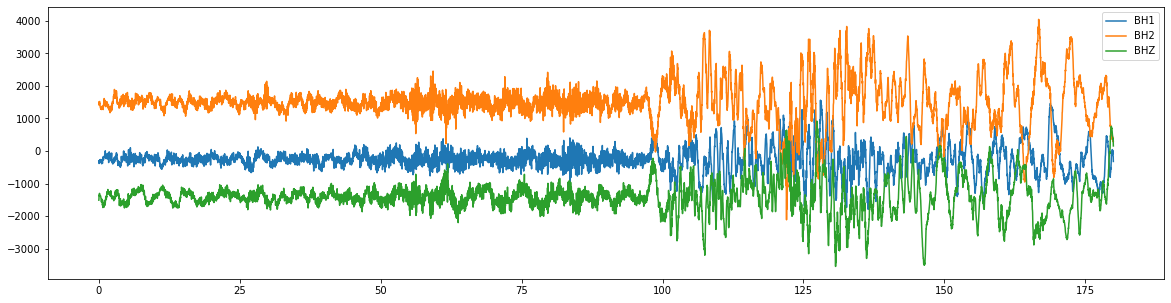

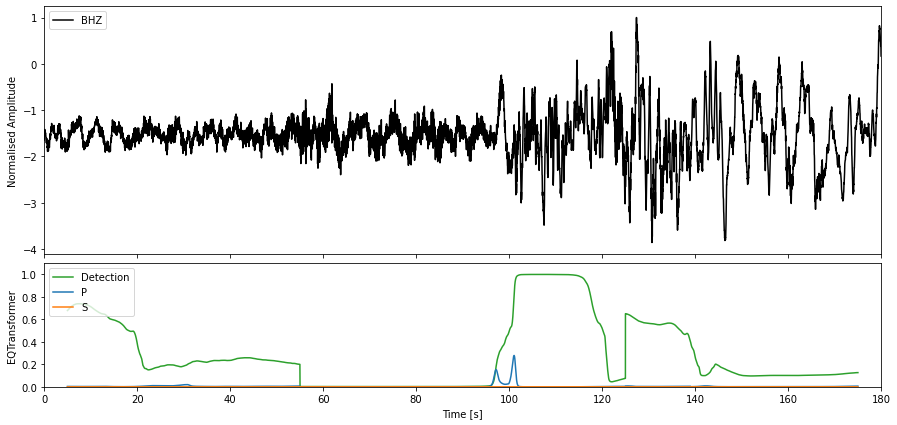

In [8]:
pretrained = "geofon"
doplot(pretrained)

{'component_order': 'ZNE', 'filter_args': ['bandpass'], 'filter_kwargs': {'freqmin': 1, 'freqmax': 45, 'corners': 2, 'zerophase': True}, 'grouping': 'instrument', 'in_channels': 3, 'in_samples': 6000, 'classes': 2, 'phases': 'PS', 'lstm_blocks': 3, 'drop_rate': 0.1, 'original_compatible': 'conservative', 'sampling_rate': 100}


/home/thobo/anaconda3/envs/seisbench/lib/python3.9/site-packages/obspy/signal/filter.py:67: UserWarning: Selected high corner frequency (45) of bandpass is at or above Nyquist (20.0). Applying a high-pass instead.
  warnings.warn(msg)


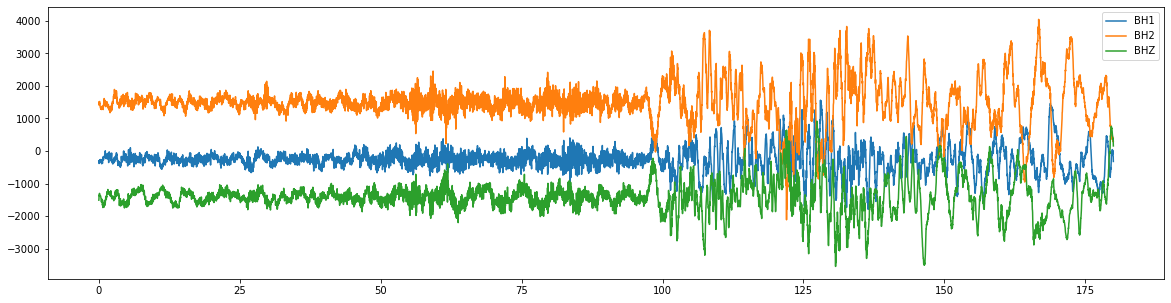

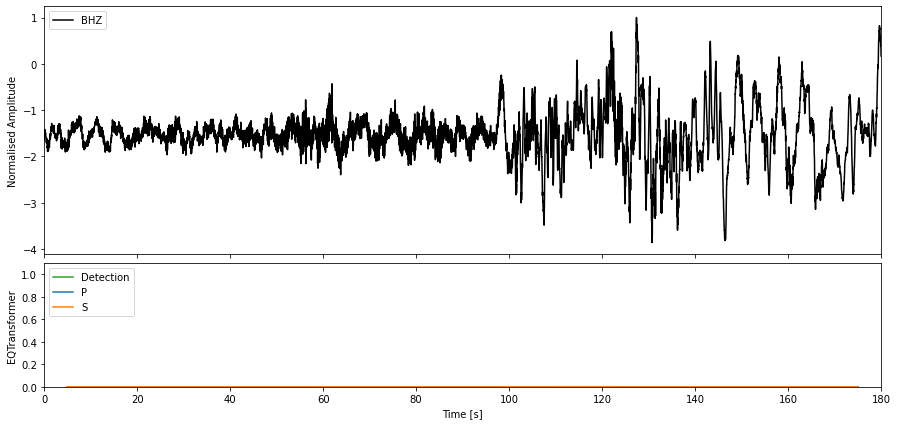

In [9]:

pretrained = "original"
doplot(pretrained)
